In [2]:
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.0 MB/s eta 0:00:00


Columns available: ['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name', 'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores', 'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused', 'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships', 'links.patch.small', 'links.patch.large', 'links.reddit.campaign', 'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery', 'links.flickr.small', 'links.flickr.original', 'links.presskit', 'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia', 'fairings']


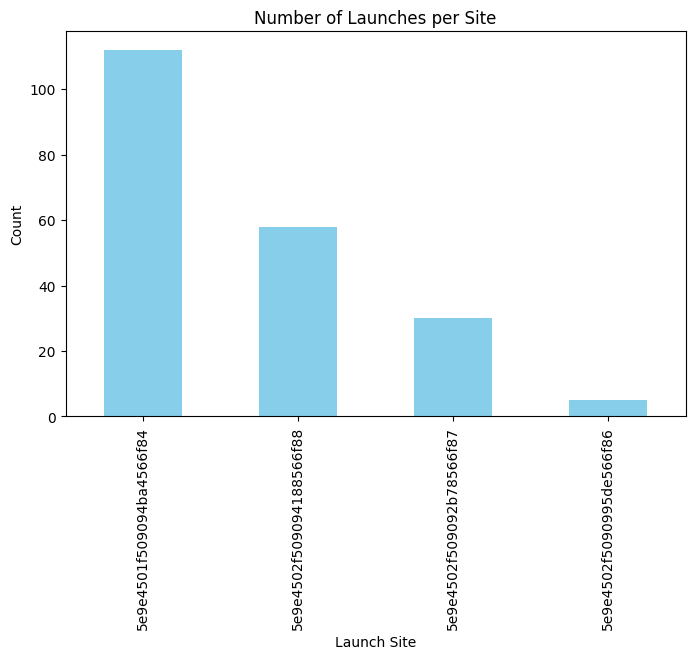

/tmp/ipykernel_447/313651771.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=outcome_col, palette="Set2")


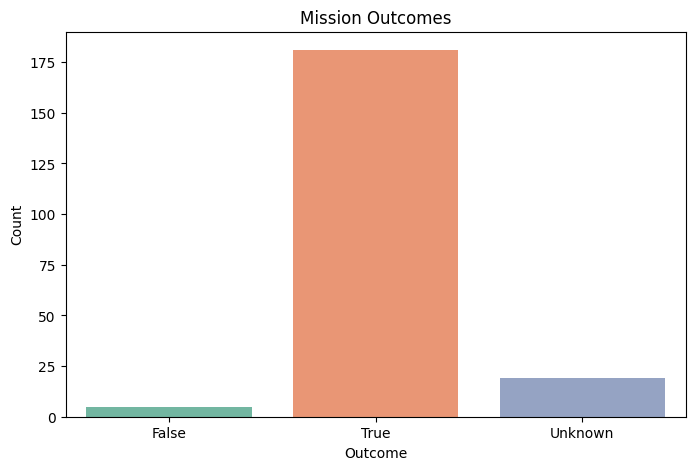

IndexError: list index out of range

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("spacex_launch_data.csv")  # replace with your CSV path

# Inspect column names
print("Columns available:", df.columns.tolist())

# Bar chart: Number of launches per site
launch_site_col = [col for col in df.columns if "launch" in col.lower()][0]
plt.figure(figsize=(8,5))
df[launch_site_col].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Count')
plt.show()

# Count plot: Mission outcome
outcome_col = [col for col in df.columns if "outcome" in col.lower() or "success" in col.lower()][0]
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=outcome_col, palette="Set2")
plt.title('Mission Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Histogram: Payload Mass distribution
payload_col = [col for col in df.columns if "payload" in col.lower() and "mass" in col.lower()][0]
plt.figure(figsize=(8,5))
sns.histplot(df[payload_col].dropna(), bins=20, kde=True, color='green')
plt.title('Payload Mass Distribution')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Payload Mass vs. Flight Number
flight_col = [col for col in df.columns if "flight" in col.lower()][0]
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=flight_col, y=payload_col, hue=outcome_col)
plt.title('Payload Mass vs Flight Number')
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg)')
plt.show()

# Pie chart: Success vs Failure
success_counts = df[outcome_col].value_counts()
plt.figure(figsize=(6,6))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Mission Outcome Distribution')
plt.show()
